In [7]:
#The table contains data for 45 Walmart stores.
#Their weekly sales, air temperature and fuel prices in the region where a particular store is located.
#As well as information on the consumer price index and unemployment rate. 
#The goal is to generate as many insights as possible from the data to help Walmart make better decisions.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df= pd.read_csv('Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
#Exploratory Data Analysis
print("Data Info")
print(df.info())
print("\n")
print("Data Description\n")
print(df.describe())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


Data Description

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000  

In [9]:
#Handling missing values
print("Missing Values\n")
print(data.isnull().sum())

# Fill missing values with mean (for numerical columns)
df.fillna(df.mean(), inplace=True)

# Fill missing values with mode (for categorical columns)
df.fillna(df.mode(), inplace=True)

Missing Values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


/tmp/ipykernel_40751/102971013.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


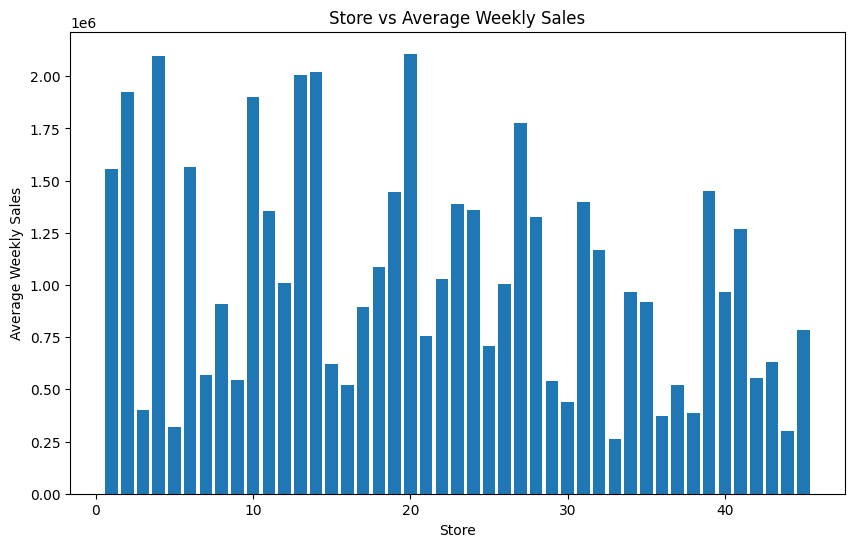

In [12]:
#Data Visualization

# Calculate the average weekly sales per store
average_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Create the graph
plt.figure(figsize=(10, 6))
plt.bar(average_sales.index, average_sales.values)
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Store vs Average Weekly Sales')
plt.show()

In [14]:
#Insight 1: Store with highest average weekly sales.
highest_sales_store = average_sales.idxmax()
print("Store with the highest average weekly sales:", highest_sales_store)
print("Average weekly sales:", average_sales.max())


Store with the highest average weekly sales: 20
Average weekly sales: 2107676.8703496503


In [15]:
#Insight 2: Store with lowest average weekly sales.
lowest_sales_store = average_sales.idxmin()
print("Store with the lowest average weekly sales:", lowest_sales_store)
print("Average weekly sales:", average_sales.min())

Store with the lowest average weekly sales: 33
Average weekly sales: 259861.69202797202
